In [176]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
ctg = pd.read_csv('CTG.csv')

In [178]:
ctg.head()

,LB,AC,FM,NSP
0,120,0.000,0.0,2
1,132,0.006,0.0,1
2,133,0.003,0.0,1
3,134,0.003,0.0,1
4,132,0.007,0.0,1


In [179]:
ctg.isnull().sum()[ctg.isnull().sum()>0]

Series([], dtype: int64)

# Method 1

- By using x, y we split data into independent variable & target variable but by using this technique we are not able to do oversampling which is required for follwoing model so we are going to use method 2 

In [182]:
# x = ctg.iloc[:,:-1]
# y = ctg.iloc[:,-1]

In [183]:
# x

In [184]:
# y

In [185]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [186]:
# ctg.NSP.value_counts()

- Here we are not able to access NSP column due to split that's why we are using second method

In [188]:
# df2_i = y_train[y_train.NSP == 2].index
# df3_i = y_train[y_train.NSP == 3].index

# df2 = x_train.loc[df2_i]
# df3 = x_train.loc[df3_i]

# x_train = pd.concat([x_train, df3, df3, df3, df2])
# y_train = pd.concat([y_train, y_train.loc[df3_i], y_train.loc[df3_i], y_train.loc[df3_i], y_train.loc[df2_i]])

# Method 2

- In this method first we are going to split data directly into training & testing and after oversampling we split into x_train, y_train, x_test, y_test.

In [191]:
from sklearn.model_selection import train_test_split
ctg_train, ctg_test = train_test_split(ctg, test_size=.2, random_state=42)

In [192]:
ctg.NSP.value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

In [193]:
df2 = ctg_train[ctg_train.NSP == 2]
df3 = ctg_train[ctg_train.NSP == 3]
ctg_train = pd.concat([ctg_train, df3, df3, df3, df3, df2])

In [194]:
ctg_train.NSP.value_counts()

NSP
1    1322
3     735
2     462
Name: count, dtype: int64

In [195]:
x_train = ctg_train.iloc[:,:-1]
y_train = ctg_train.iloc[:,-1]

x_test = ctg_train.iloc[:,:-1]
y_actual = ctg_train.iloc[:,-1]

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

In [197]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [198]:
y_pred  = knn.predict(x_test)

In [199]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [200]:
confusion_matrix(y_actual, y_pred)

array([[1112,   94,  116],
       [ 112,  272,   78],
       [ 120,   60,  555]], dtype=int64)

In [201]:
accuracy_score(y_actual, y_pred)

0.7697499007542675

In [224]:
# For above model we have randomly take k's value so now we will plot the graph and choose the k's value

In [226]:
l = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_actual, y_pred)
    acc = accuracy_score(y_actual, y_pred)
    l.append(acc)

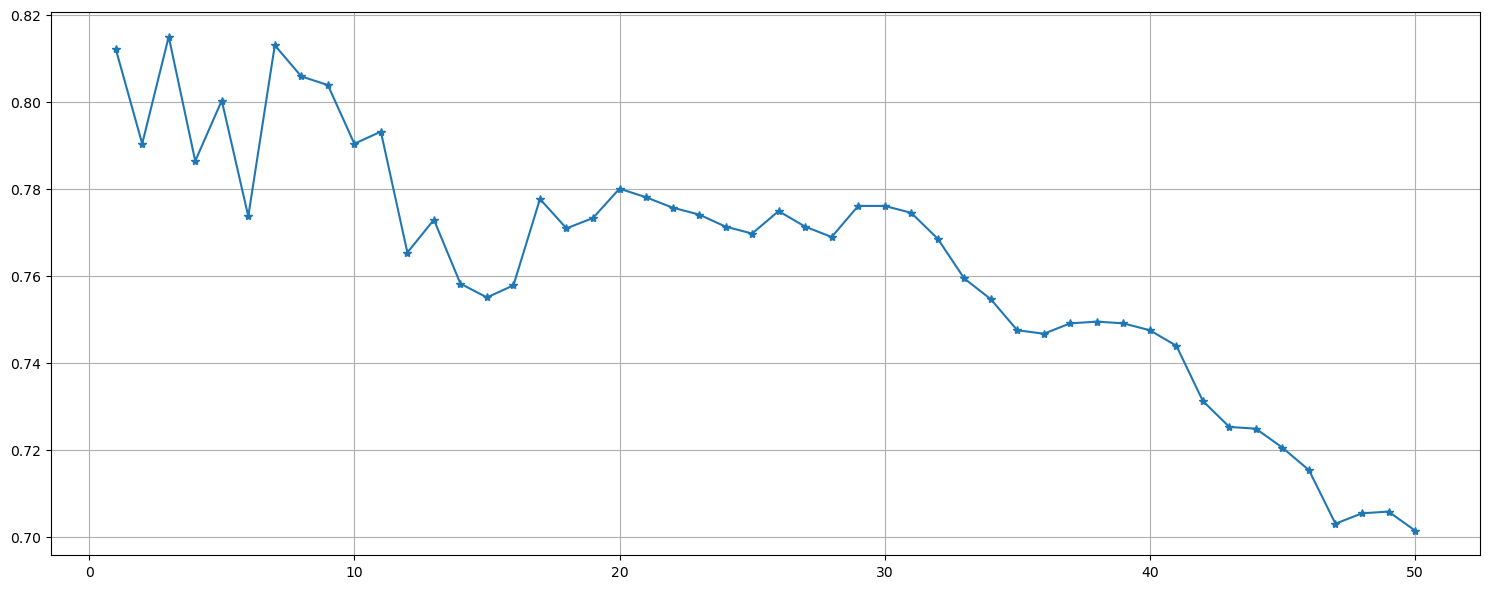

In [242]:
plt.figure(figsize = (15, 6))
plt.plot(list(range(1,51)), l[:50], marker='*')
plt.grid()
plt.tight_layout()
plt.show()

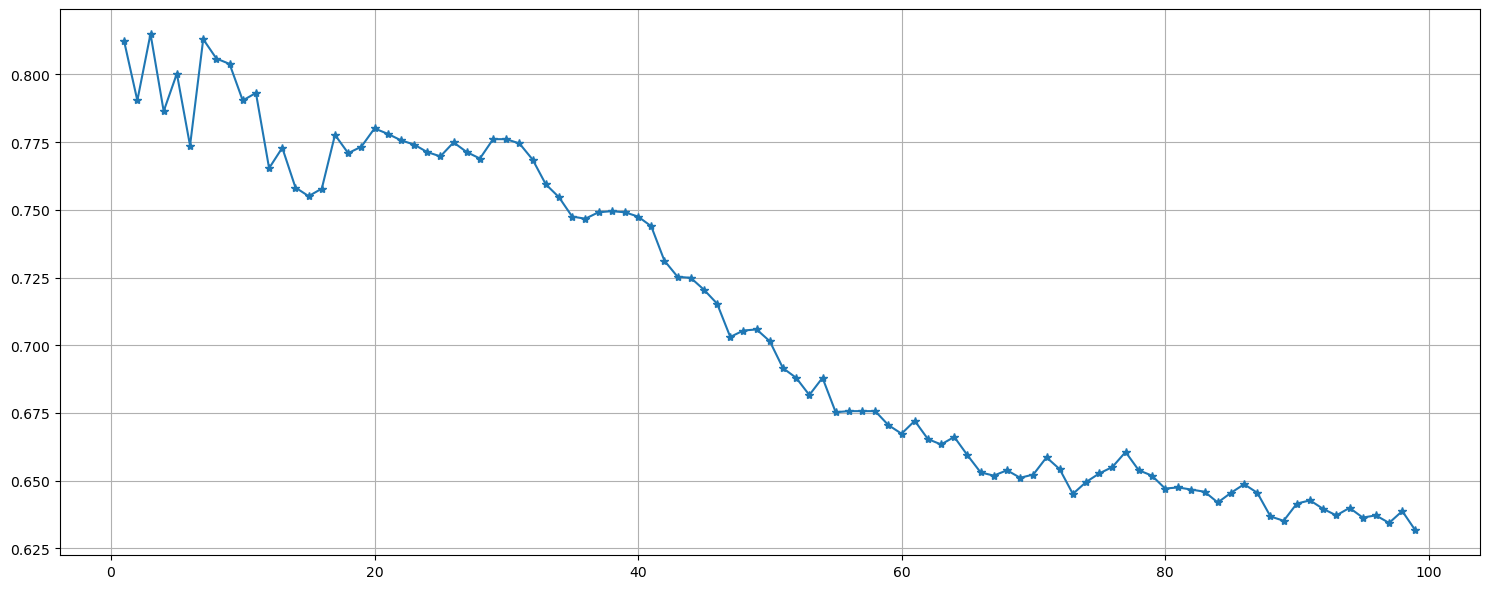

In [236]:
plt.figure(figsize = (15, 6))
plt.plot(list(range(1,100)), l, marker='*')
plt.grid()
plt.tight_layout()
plt.show()